In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
df = pd.read_csv("data/energy_consumption.csv")

In [206]:
df

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06
...,...,...,...,...,...,...
4995,CUSTOMER_4996,commercial,Southeast,45,4,146.67
4996,CUSTOMER_4997,residential,Southeast,24,1,72.91
4997,CUSTOMER_4998,residential,South,17,2,72.22
4998,CUSTOMER_4999,commercial,Northeast,45,2,86.28


In [207]:
df.isna().sum()

customer_id         0
customer_type       0
regions             0
building_size_m2    0
occupants           0
energy_cost_brl     0
dtype: int64

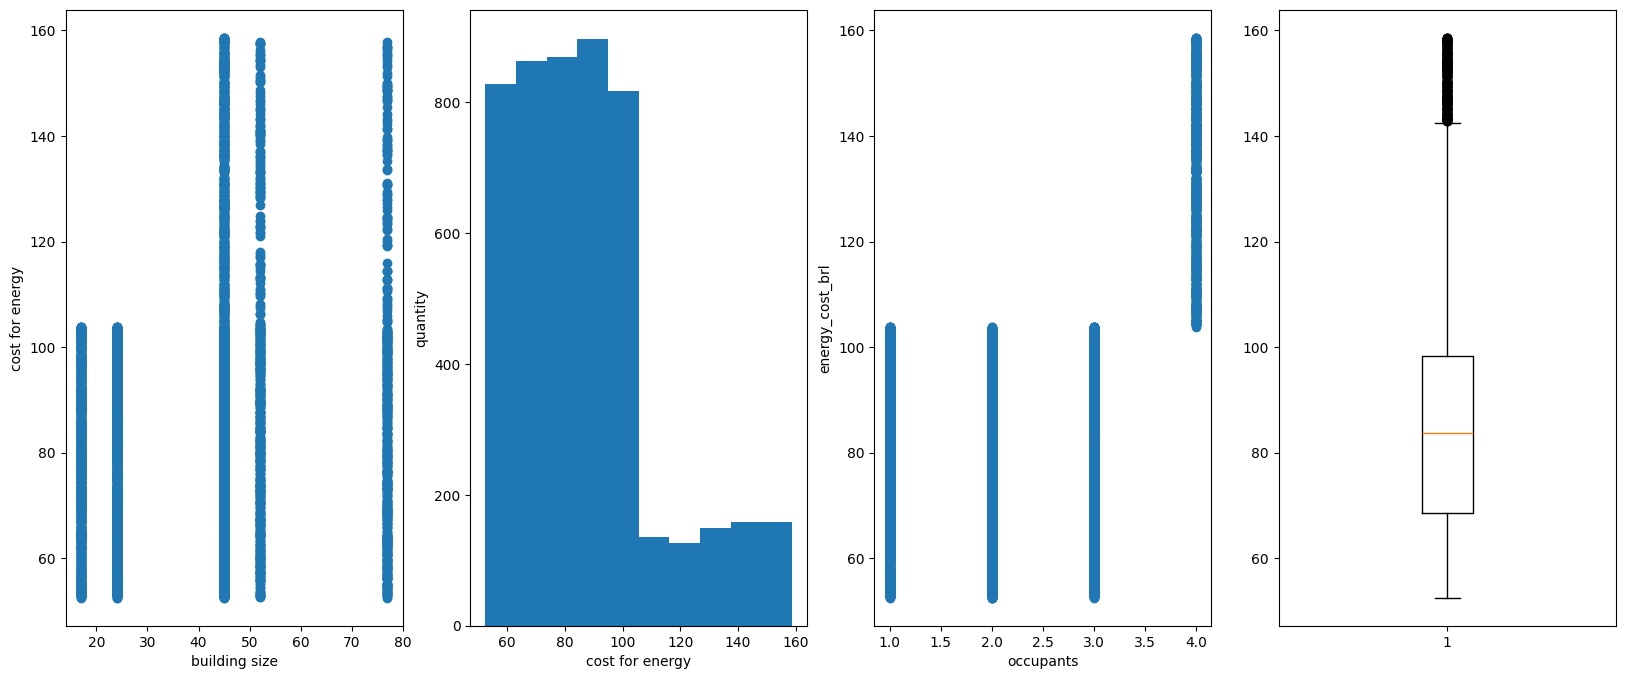

In [208]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.scatter(x=df["building_size_m2"], y=df["energy_cost_brl"])
plt.xlabel("building size")
plt.ylabel("cost for energy")
plt.subplot(1,4,2)
plt.hist(x=df["energy_cost_brl"])
plt.xlabel("cost for energy")
plt.ylabel("quantity")
plt.subplot(1,4,3)
plt.scatter(x=df["occupants"], y=df["energy_cost_brl"])
plt.xlabel("occupants")
plt.ylabel("energy_cost_brl")
plt.subplot(1,4,4)
plt.boxplot(x=df["energy_cost_brl"])
plt.show()

In [213]:
customer_type = df["customer_type"].unique().tolist()
regions = df["regions"].unique().tolist()
print(customer_type)
print(regions)

['residential', 'commercial']
['Northeast', 'Midwest', 'Southeast', 'North', 'South']


In [215]:
df = df.drop(columns=["customer_id"])
df = pd.get_dummies(df,columns=["regions"], drop_first=True, dtype="int")
df = df.replace(['residential', 'commercial'], [0,1])

C:\Users\polis\AppData\Local\Temp\ipykernel_16512\3546461213.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['residential', 'commercial'], [0,1])


In [221]:
df_140 = df[["occupants", "building_size_m2", "regions_North", "regions_Southeast", "energy_cost_brl"]]
df_140

,occupants,building_size_m2,regions_North,regions_Southeast,energy_cost_brl
0,2,24,0,0,64.51
1,1,24,0,0,55.26
2,1,24,0,1,74.54
3,4,45,0,0,147.06
4,4,45,0,1,143.06
...,...,...,...,...,...
4995,4,45,0,1,146.67
4996,1,24,0,1,72.91
4997,2,17,0,0,72.22
4998,2,45,0,0,86.28


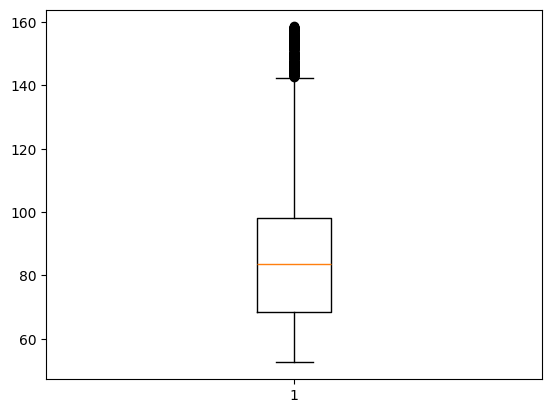

In [222]:
plt.boxplot(x=df_140["energy_cost_brl"])
plt.show()

In [223]:
df.describe()

,customer_type,building_size_m2,occupants,energy_cost_brl,regions_North,regions_Northeast,regions_South,regions_Southeast
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.34780,39.57620,2.301800,86.874028,0.151800,0.253200,0.096400,0.096200
std,0.47632,17.51638,1.032729,24.383261,0.358863,0.434888,0.295169,0.294895
min,0.00000,17.00000,1.000000,52.520000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,24.00000,1.000000,68.557500,0.000000,0.000000,0.000000,0.000000
50%,0.00000,45.00000,2.000000,83.715000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,45.00000,3.000000,98.242500,0.000000,1.000000,0.000000,0.000000
max,1.00000,77.00000,4.000000,158.610000,1.000000,1.000000,1.000000,1.000000


In [224]:
df_140.describe()

,occupants,building_size_m2,regions_North,regions_Southeast,energy_cost_brl
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2.301800,39.57620,0.151800,0.096200,86.874028
std,1.032729,17.51638,0.358863,0.294895,24.383261
min,1.000000,17.00000,0.000000,0.000000,52.520000
25%,1.000000,24.00000,0.000000,0.000000,68.557500
50%,2.000000,45.00000,0.000000,0.000000,83.715000
75%,3.000000,45.00000,0.000000,0.000000,98.242500
max,4.000000,77.00000,1.000000,1.000000,158.610000


In [225]:
df.corr()

,customer_type,building_size_m2,occupants,energy_cost_brl,regions_North,regions_Northeast,regions_South,regions_Southeast
customer_type,1.000000,-0.006570,-0.032464,-0.015604,0.010556,-0.007064,-0.015138,0.001009
building_size_m2,-0.006570,1.000000,0.182522,0.195921,0.046133,-0.035595,-0.011519,-0.005156
occupants,-0.032464,0.182522,1.000000,0.535797,0.009140,-0.018742,0.006912,0.010401
energy_cost_brl,-0.015604,0.195921,0.535797,1.000000,0.012504,0.001275,-0.001743,0.016372
regions_North,0.010556,0.046133,0.009140,0.012504,1.000000,-0.246330,-0.138177,-0.138019
regions_Northeast,-0.007064,-0.035595,-0.018742,0.001275,-0.246330,1.000000,-0.190187,-0.189968
regions_South,-0.015138,-0.011519,0.006912,-0.001743,-0.138177,-0.190187,1.000000,-0.106562
regions_Southeast,0.001009,-0.005156,0.010401,0.016372,-0.138019,-0.189968,-0.106562,1.000000


In [226]:
df_140.corr()

,occupants,building_size_m2,regions_North,regions_Southeast,energy_cost_brl
occupants,1.000000,0.182522,0.009140,0.010401,0.535797
building_size_m2,0.182522,1.000000,0.046133,-0.005156,0.195921
regions_North,0.009140,0.046133,1.000000,-0.138019,0.012504
regions_Southeast,0.010401,-0.005156,-0.138019,1.000000,0.016372
energy_cost_brl,0.535797,0.195921,0.012504,0.016372,1.000000


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

In [227]:
X_1 = df.drop(columns=["energy_cost_brl"])
y_1 = df[["energy_cost_brl"]]
X_2 = df_140.drop(columns=["energy_cost_brl"])
y_2 = df_140[["energy_cost_brl"]]

In [228]:
scaler = StandardScaler()
X_scaler_1 = scaler.fit_transform(X_1)
X_scaler_2 = scaler.fit_transform(X_2)

In [229]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaler_1, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaler_2, y_2, test_size=0.2, random_state=42)

In [230]:
model = LinearRegression()
model.fit(X_train_2, y_train_2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [231]:
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train_2, y_train_2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [232]:
pred_for_liner = model.predict(X_test_2)
pred_for_tree = tree.predict(X_test_2)

In [233]:
R2_liner = r2_score(y_test_2, pred_for_liner)
R2_tree = r2_score(y_test_2, pred_for_tree)
RMSE_for_liner = root_mean_squared_error(y_test_2, pred_for_liner)
RMSE_for_tree = root_mean_squared_error(y_test_2, pred_for_tree)
MAE_liner = mean_absolute_error(y_test_2, pred_for_liner)
MAE_tree = mean_absolute_error(y_test_2, pred_for_tree)
print(f"R2 liner: {R2_liner}  | R2 tree: {R2_tree}")
print(f"RMSE liner: {RMSE_for_liner} | RMSE tree: {RMSE_for_tree}")
print(f"MAE liner: {MAE_liner}  | MAE tree: {MAE_tree}")

R2 liner: 0.3101100448897953  | R2 tree: 0.617693546425863
RMSE liner: 20.10940955437042 | RMSE tree: 14.96977328257058
MAE liner: 16.301718169494066  | MAE tree: 12.917193878804982
